# Forecasting of Products at Item level in Weekly buckets
To implement multivariate forecasting models in Python using parallel computing, you can follow these steps:

    Import necessary libraries: Import required libraries such as pandas, numpy, sklearn, joblib, and multiprocessing.

    Load the data: Load the data into a pandas dataframe.

    Split the data into training and testing sets: Split the data into training and testing sets.

    Define the features and target variables: Define the features and target variables for each model.

    Define the models: Define five multivariate forecasting models that you want to use. For example, you can use Random Forest Regression, Gradient Boosting Regression, Lasso Regression, Ridge Regression, and XGBoost Regression.

    Create a function to train each model: Create a function that trains each model on the training set and returns the trained model.

    Create a function to predict using each model: Create a function that predicts using each model on the testing set and returns the predicted values.

    Create a parallel processing function: Create a function that takes a list of models as input and uses the joblib library to parallelize the model training and prediction.

    Call the parallel processing function: Call the parallel processing function and pass the list of models as input.

    Evaluate the performance: Evaluate the performance of each model by calculating metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) on the testing set.

A forecast at item level in weekly buckets means predicting future demand or sales for each individual product on a weekly basis. This type of forecast is often used in retail or inventory management, where it is important to have a detailed understanding of product demand in order to optimize stock levels and ensure that there are enough products available to meet customer demand without overstocking and tying up capital.

Forecasting at the item level in weekly buckets typically involves analyzing historical sales data for each product to identify trends, seasonal patterns, and other factors that influence sales. This information is then used to develop a statistical model that can be used to make predictions about future sales for each product on a weekly basis.

Accurate forecasting at the item level in weekly buckets can help retailers optimize their inventory levels, improve supply chain efficiency, and ensure that they have the right products available at the right time to meet customer demand. It can also help retailers to identify opportunities to improve their marketing and promotional strategies by analyzing how different promotions and marketing initiatives impact sales for individual products over time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel('Downloads/forecasting_case_study.xlsx')

This data is in a table format with each row representing the sales data of a specific product for a specific date. The columns represent different variables that can affect sales of the product, such as the sales price, discounts offered, in-store promotion, catalogue promotion, store end promotion, Google mobility, Covid_flag, and various holidays like V_DAY, EASTER, and CHRISTMAS.

For example, the first row shows that for SKU1 product sold on 2017-02-05, there were no discounts or promotions offered, and there were no holidays that could have affected the sales. The sales amount was 27750. Similarly, each row shows sales data for a particular product on a particular date, along with the corresponding values of other variables that can affect sales.

This data can be used to build a time series forecasting model to predict future sales of the products. The sales, price, discounts, promotions, and holiday variables can be used as input features to the forecasting model, and the date column can be used as the time index.


In [3]:
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


### CHECKING FOR ANY NULL OR MISSING VALUES
The first step you should do is to analyze and understand the data to identify any patterns, trends, and relationships between variables. This will help you determine which variables are important and how they affect the sales of the product.

To start with, you should examine the variables in the dataset and their corresponding data types. Based on your earlier description, it appears that all the variables are numeric except for the product and date columns.

You should also check if there are any missing values in the dataset and if so, how to handle them. Missing values can affect the accuracy of your analysis and forecast, so it is important to address them appropriately.

After checking for missing values, you should then look for outliers and anomalies in the data. Outliers are data points that lie far away from the majority of the data, and they can significantly impact your analysis and forecast. You may need to remove or adjust these data points to ensure that your analysis and forecast are accurate.

Finally, you should explore the relationships between variables and how they affect sales. For example, you may want to examine how changes in price discounts, promotions, or holidays impact sales. By understanding these relationships, you can develop a more accurate forecast model that takes into account various factors that affect sales.

In [4]:
data.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

In [5]:
data.corr()

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
Sales,1.000000,0.403196,0.240891,-0.121081,0.235439,0.058781,-0.085571,-0.008442,-0.010266,-0.035916
Price Discount (%),0.403196,1.000000,0.217904,-0.074055,0.216127,-0.213534,0.281537,-0.044565,0.000959,-0.012153
In-Store Promo,0.240891,0.217904,1.000000,-0.491438,0.367004,0.056074,-0.024732,0.019761,0.019761,0.013799
Catalogue Promo,-0.121081,-0.074055,-0.491438,1.000000,0.116301,0.073260,-0.094373,-0.044805,-0.044805,0.045834
Store End Promo,0.235439,0.216127,0.367004,0.116301,1.000000,0.084955,-0.075321,0.020148,-0.066610,-0.000322
Google_Mobility,0.058781,-0.213534,0.056074,0.073260,0.084955,1.000000,-0.756752,0.078227,-0.108645,0.003461
Covid_Flag,-0.085571,0.281537,-0.024732,-0.094373,-0.075321,-0.756752,1.000000,0.007924,0.007924,-0.003052
V_DAY,-0.008442,-0.044565,0.019761,-0.044805,0.020148,0.078227,0.007924,1.000000,-0.020101,-0.019669
EASTER,-0.010266,0.000959,0.019761,-0.044805,-0.066610,-0.108645,0.007924,-0.020101,1.000000,-0.019669
CHRISTMAS,-0.035916,-0.012153,0.013799,0.045834,-0.000322,0.003461,-0.003052,-0.019669,-0.019669,1.000000


<AxesSubplot:>

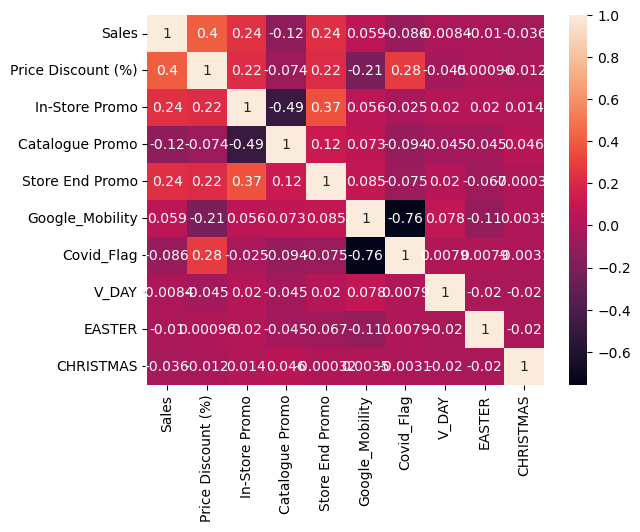

In [6]:
sns.heatmap(data.corr(),annot=True)

Coverting Date to Datetime Object and Using it as index

In [7]:
data['date']= pd.to_datetime(data['date'])
data['date']

0      2017-02-05
1      2017-02-12
2      2017-02-19
3      2017-02-26
4      2017-03-05
          ...    
1213   2020-10-18
1214   2020-10-25
1215   2020-11-01
1216   2020-11-08
1217   2020-11-15
Name: date, Length: 1218, dtype: datetime64[ns]

In [30]:
data.set_index('date', inplace=True)

In [32]:
data['day'] = data.index.day
data['year'] = data.index.year


In [33]:
data.head()

,Product,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,day,year
date,,,,,,,,,,,,,
2017-02-05,SKU1,27750,0.00,0,0,0,0.0,0,0,0,0,5,2017
2017-02-12,SKU1,29023,0.00,1,0,1,0.0,0,1,0,0,12,2017
2017-02-19,SKU1,45630,0.17,0,0,0,0.0,0,0,0,0,19,2017
2017-02-26,SKU1,26789,0.00,1,0,1,0.0,0,0,0,0,26,2017
2017-03-05,SKU1,41999,0.17,0,0,0,0.0,0,0,0,0,5,2017


In [37]:
data['Product'].unique()

array(['SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5', 'SKU6'], dtype=object)

### The date ranges from 2017 February to 2020 December

In [35]:
data['year'].unique()

array([2017, 2018, 2019, 2020], dtype=int64)

In [12]:
data['Google_Mobility'].unique()

array([  0.  ,   2.36,   3.3 ,   3.9 ,   3.81,   3.01,   0.26, -15.7 ,
       -26.63, -28.49, -27.3 , -24.28, -22.58, -18.18, -15.91, -15.27,
       -13.24, -10.86, -10.13,  -8.68,  -8.57,  -7.5 ,  -8.04,  -9.36,
        -8.77,  -9.93, -11.65, -13.23, -20.35, -19.41, -18.83, -16.44,
        -7.28,  -9.87,  -7.79,  -9.73,  -7.39,  -7.56,  -8.39,  -7.43,
        -5.95,  -7.2 ,  -5.96,  -5.3 ,  -4.38,  -4.74, -10.27,  -6.95])

In [13]:
data['Price Discount (%)'].unique()

array([0.  , 0.17, 0.44, 0.06, 0.28, 0.13, 0.04, 0.01, 0.02, 0.45, 0.03,
       0.18, 0.12, 0.16, 0.15, 0.14, 0.25, 0.5 , 0.05, 0.26, 0.27, 0.23,
       0.22, 0.21, 0.3 , 0.2 , 0.4 , 0.42, 0.07, 0.09, 0.43, 0.38, 0.49,
       0.55, 0.35, 0.41, 0.33, 0.48, 0.51, 0.52, 0.34, 0.54, 0.32, 0.36,
       0.8 , 0.67, 0.74, 0.68, 0.77, 0.83, 0.71, 0.73, 0.75, 0.1 , 0.08,
       0.24, 0.47, 0.46, 0.37, 0.53, 0.7 , 0.62, 0.65, 0.66, 0.58, 0.6 ,
       0.61, 0.69, 0.64, 0.29])

In [14]:
maxdate = data['date'].max()
mindate = data['date'].min()
print(maxdate)
print(mindate)

2020-12-27 00:00:00
2017-02-05 00:00:00


In [15]:
maxsales = data['Sales'].max()
minsales = data['Sales'].min()
print(maxsales)
print(minsales)

288322
0


In [16]:
data['Product'].value_counts()

SKU1    204
SKU2    204
SKU3    204
SKU4    204
SKU5    204
SKU6    198
Name: Product, dtype: int64

<AxesSubplot:xlabel='Product', ylabel='Sales'>

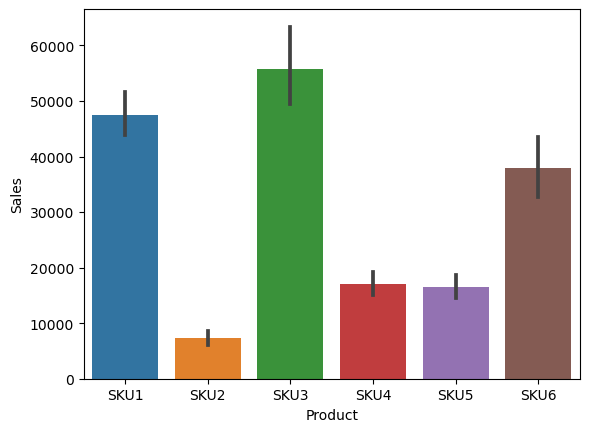

In [17]:
sns.barplot(x='Product',y='Sales',data=data)

<AxesSubplot:xlabel='Product', ylabel='Price Discount (%)'>

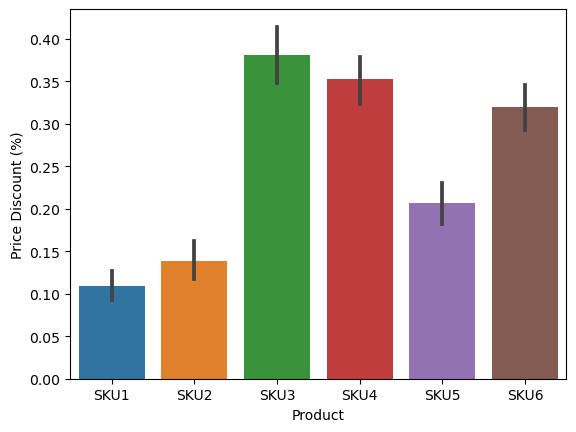

In [18]:
sns.barplot(x='Product',y='Price Discount (%)',data=data)

<AxesSubplot:xlabel='Product', ylabel='In-Store Promo'>

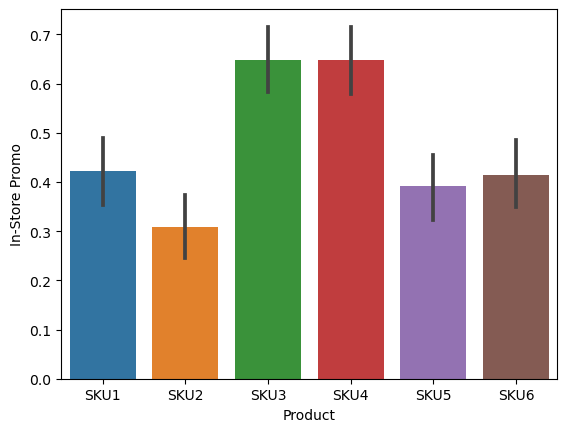

In [19]:
sns.barplot(x='Product',y='In-Store Promo',data=data)

### CHECKING FOR ANY OUTLIERS
Outliers are observations that are significantly different from other observations in the dataset, and they can occur due to various reasons, such as measurement errors or unusual events. In time series analysis, outliers can have a significant impact on the forecast accuracy, and it's important to detect and handle them appropriately.

One common method to detect outliers in time series data is by visual inspection of the data using time series plots. A time series plot shows the trend and seasonality in the data over time and allows us to identify any unusual observations that deviate from the overall pattern.

Another approach to detect outliers is by using statistical methods, such as the boxplot or the z-score. The boxplot is a graphical representation of the data distribution, and it can identify any observations that fall outside the whiskers of the boxplot. The z-score, on the other hand, measures the deviation of an observation from the mean of the data in terms of the standard deviation, and any observation with a z-score greater than a certain threshold is considered an outlier.

Once the outliers are identified, there are different methods to handle them. One approach is to remove them from the dataset, which can be appropriate if they are due to measurement errors or data entry mistakes. Another approach is to replace the outliers with a more appropriate value, such as the mean or median of the surrounding data points or a value predicted by a statistical model. Additionally, it may be necessary to investigate the root cause of the outliers and address any underlying issues to prevent them from occurring in the future.

In summary, the first step to detect outliers in time series data is to visually inspect the data using time series plots or use statistical methods such as the boxplot or z-score. Once the outliers are identified, appropriate methods can be applied to handle them, such as removal or replacement with an appropriate value.

In [20]:
data.columns

Index(['Product', 'date', 'Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS'],
      dtype='object')

In [73]:
OutlierData = df_copied['In-Store Promo']

mean = OutlierData.mean()

stdn = OutlierData.std()

zscore = (OutlierData - mean)/stdn

threshold = zscore > 3

outliers = np.where(threshold == True)
print("\033[1m Indices of outliers: \033[0m")
print(outliers)

 Indices of outliers: 
(array([], dtype=int64),)


In [82]:
data.isna().sum()

Product               0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
day                   0
year                  0
dtype: int64

In [76]:
df_copied = data.copy()
df_copied

,Product,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,day,year
date,,,,,,,,,,,,,
2017-02-05,SKU1,27750,0.00,0,0,0,0.00,0,0,0,0,5,2017
2017-02-12,SKU1,29023,0.00,1,0,1,0.00,0,1,0,0,12,2017
2017-02-19,SKU1,45630,0.17,0,0,0,0.00,0,0,0,0,19,2017
2017-02-26,SKU1,26789,0.00,1,0,1,0.00,0,0,0,0,26,2017
2017-03-05,SKU1,41999,0.17,0,0,0,0.00,0,0,0,0,5,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,SKU6,96619,0.54,0,1,0,-7.56,1,0,0,0,18,2020
2020-10-25,SKU6,115798,0.52,0,1,0,-8.39,1,0,0,0,25,2020
2020-11-01,SKU6,152186,0.54,1,0,1,-7.43,1,0,0,0,1,2020


In [60]:
df_copied.isna().sum()

Product               0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
day                   0
year                  0
dtype: int64

In [23]:
#Skewness 
#Skew = 3 * (Mean – Median) / Standard Deviation.
median = data[['Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS']].median()
Skewness = 3 * (mean - median) / stdn
print(Skewness)

Sales                 0.903676
Price Discount (%)    0.014516
In-Store Promo        2.835772
Catalogue Promo       1.558416
Store End Promo       2.195335
Google_Mobility      -1.228360
Covid_Flag            1.623200
V_DAY                 0.425154
EASTER                0.425154
CHRISTMAS             0.416028
dtype: float64


In [24]:
#Sales Outliers
ZscoreSales = data['Sales'].mean() / data['Sales'].std()
print(ZscoreSales)

0.8647585920797086


<AxesSubplot:xlabel='Sales'>

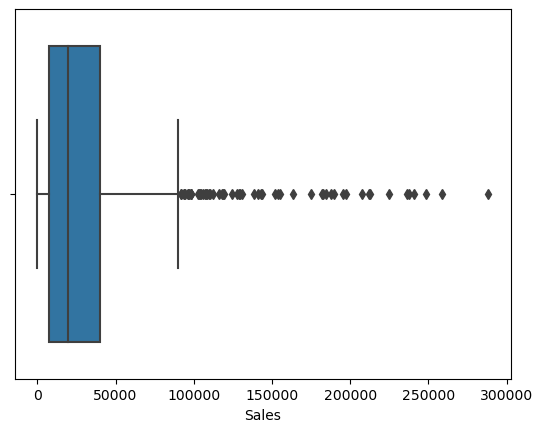

In [25]:
sns.boxplot(x='Sales',data=data)


<AxesSubplot:xlabel='Price Discount (%)'>

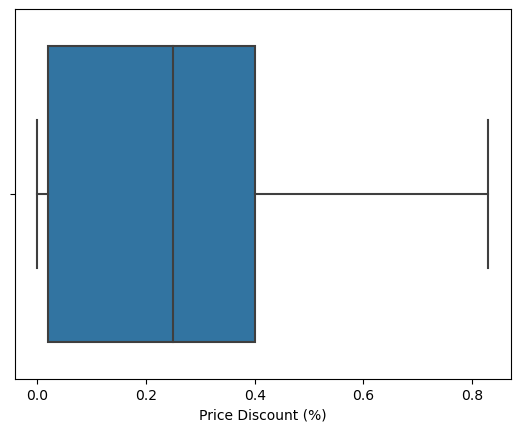

In [26]:
sns.boxplot(x='Price Discount (%)',data=data)

<AxesSubplot:xlabel='Product', ylabel='Google_Mobility'>

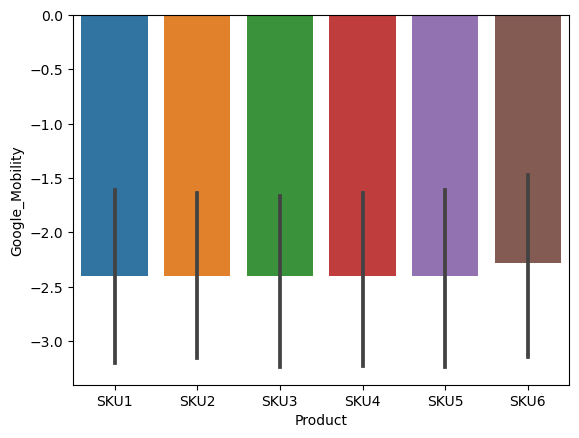

In [27]:
sns.barplot(x='Product',y='Google_Mobility',data=data)

ValueError: cannot set using a list-like indexer with a different length than the value

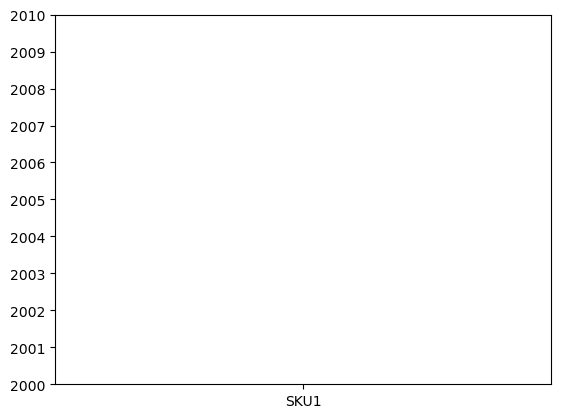

In [112]:
sns.lineplot(x="Product", y="date",data=data)

In [113]:
product_dict = {}
count = 0
for product in df_copied['Product'].unique():
    product_dict[product] = count
    count += 1

# replace product strings with numerical values using the dictionary
df_copied['Product'] = df_copied['Product'].map(product_dict)

In [121]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [115]:
X = df_copied[['Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS']]
y = df_copied['Product']

In [116]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [118]:
linearR = LinearRegression()

In [119]:
linearR.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = linearR.predict(X_test)

In [122]:
# Calculate metrics
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)

# Print metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared score:', r2_score)

Mean Squared Error: 2.369663640862471
Root Mean Squared Error: 1.539371183588439
Mean Absolute Error: 1.3244995748177406
R-squared score: 0.17030017827372868


In [29]:
# To perform multiprocessing or parallel computing of 5 ML models in Python using PySpark, you can follow these steps:

#     Import the necessary PySpark modules and libraries:

# python

# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SparkSession
# from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, NaiveBayes, GBTClassifier
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#     Create a SparkConf and SparkContext:

# scss

# conf = SparkConf().setAppName("Parallel_Modeling")
# sc = SparkContext(conf=conf)

#     Create a SparkSession:

# makefile

# spark = SparkSession.builder.appName("Parallel_Modeling").getOrCreate()

#     Load the data into a PySpark DataFrame:

# python

# data = spark.read.csv('data.csv', header=True, inferSchema=True)

#     Split the data into training and testing sets:

# css

# trainingData, testData = data.randomSplit([0.7, 0.3], seed=100)

#     Create a list of ML models to be parallelized:

# css

# models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), NaiveBayes(), GBTClassifier()]

#     Define a function to train and evaluate the models in parallel:

# python

# def train_and_evaluate(model):
#     model_name = type(model).__name__
#     print(f'Training {model_name}...')
#     model.fit(trainingData)
#     predictions = model.transform(testData)
#     evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
#     accuracy = evaluator.evaluate(predictions)
#     print(f'{model_name} accuracy: {accuracy}')
#     return (model_name, accuracy)

#     Use PySpark's parallelize() method to parallelize the training and evaluation of the models:

# scss

# results = sc.parallelize(models).map(train_and_evaluate).collect()

#     Display the results:

# sql

# for result in results:
#     print(result)

# This will train and evaluate the 5 ML models in parallel using PySpark, and output their accuracy scores.
